# Seaborn Refresher

### Introduction


### Goals of the Notebook
 * 

### Importing 
Just a typical data science library stack for the EDA notebook.

In [1]:
import random

import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

### CSV File Importing 

In [2]:
n = 1000

csv_filename = 'data/data.csv'
num_lines = sum(1 for l in open(csv_filename))

skip_ix = [x for x in range(1, num_lines) if x % n != 0]

data_df = pd.read_csv(
    csv_filename,
    skiprows=skip_ix
)

print("Columns in List: \n")
for column in list(data_df):
    print(column)

Columns in List
trip_id
year
month
week
day
hour
usertype
gender
starttime
stoptime
tripduration
temperature
events
from_station_id
from_station_name
latitude_start
longitude_start
dpcapacity_start
to_station_id
to_station_name
latitude_end
longitude_end
dpcapacity_end


**Thoughts:** There are a few really interesting features contained within the dataset that I'll want to explore moving foward in this notebook. I'll break the features down sort of categorically here.

**Geographical:**
 * from_station_id
 * from_station_name
 * latitude_start
 * longitude_start
 * to_station_id
 * to_station_name
 * latitude_end
 * longitude_end
 
**Weather:**
 * temperature
 * events
 
**Datetime:**
 * year
 * month
 * week
 * day
 * hour
 * starttime
 * stoptime
 * tripduration
 
**User-Specific:**
 * usertype
 * gender

## Distribution Plotting

We'll go through some of the basic functionality that comes with Seaborn for getting a feel for the distribution of our dataset. 

### Temperature Distribution

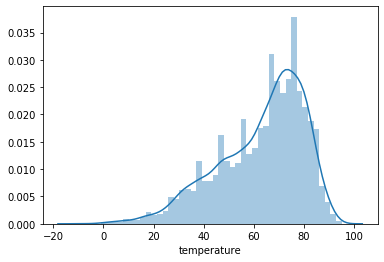

In [13]:
sns.distplot(
    data_df['temperature']
)

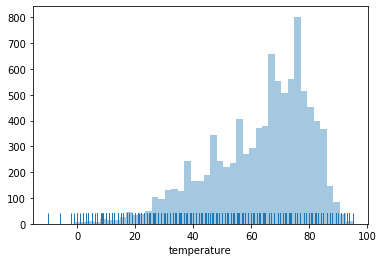

In [17]:
sns.distplot(
    data_df['temperature'],
    kde=False,
    rug=True
)

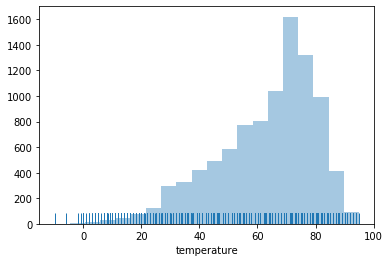

In [19]:
sns.distplot(
    data_df['temperature'],
    bins=20,
    kde=False,
    rug=True
)

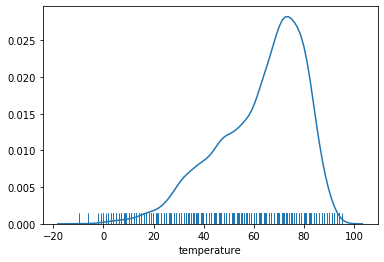

In [20]:
sns.distplot(
    data_df['temperature'],
    hist=False,
    rug=True
)

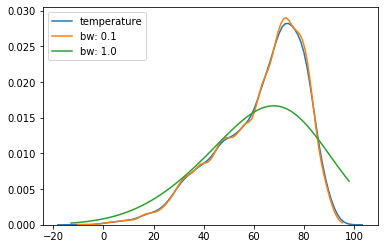

In [25]:
sns.kdeplot(data_df['temperature'])
sns.kdeplot(data_df['temperature'], bw=0.1, label="bw: 0.1")
sns.kdeplot(data_df['temperature'], bw=1.0, label="bw: 1.0")
plt.legend()

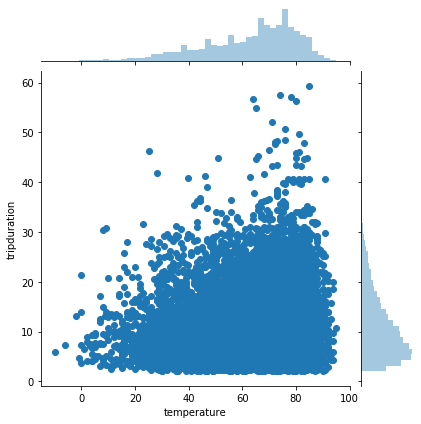

In [26]:
sns.jointplot(
    data_df['temperature'], 
    data_df['tripduration']
)

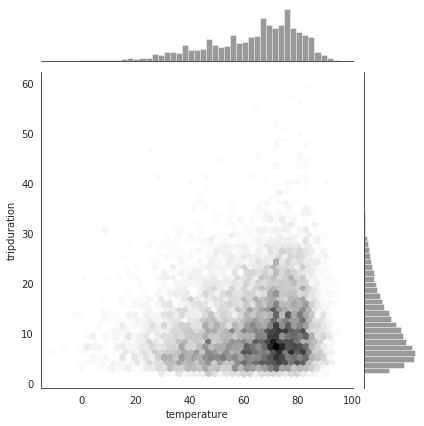

In [28]:
with sns.axes_style("white"):
    sns.jointplot(x=data_df['temperature'], y=data_df['tripduration'], kind="hex", color="k")

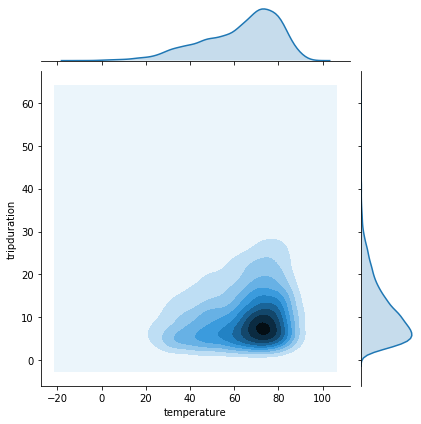

In [29]:
sns.jointplot(
    data_df['temperature'], 
    data_df['tripduration'],
    kind='kde'
)

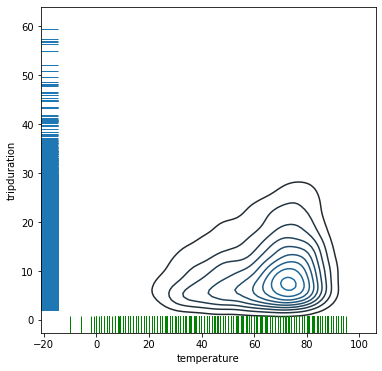

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data_df.temperature, data_df.tripduration, ax=ax)
sns.rugplot(data_df.temperature, color="g", ax=ax)
sns.rugplot(data_df.tripduration, vertical=True, ax=ax)

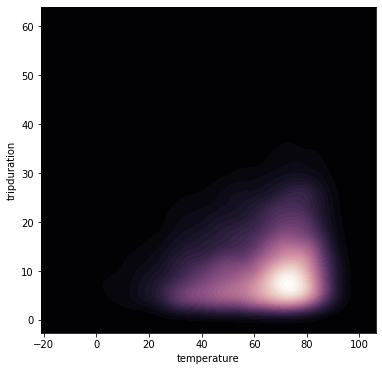

In [31]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(data_df.temperature, data_df.tripduration, cmap=cmap, n_levels=60, shade=True)

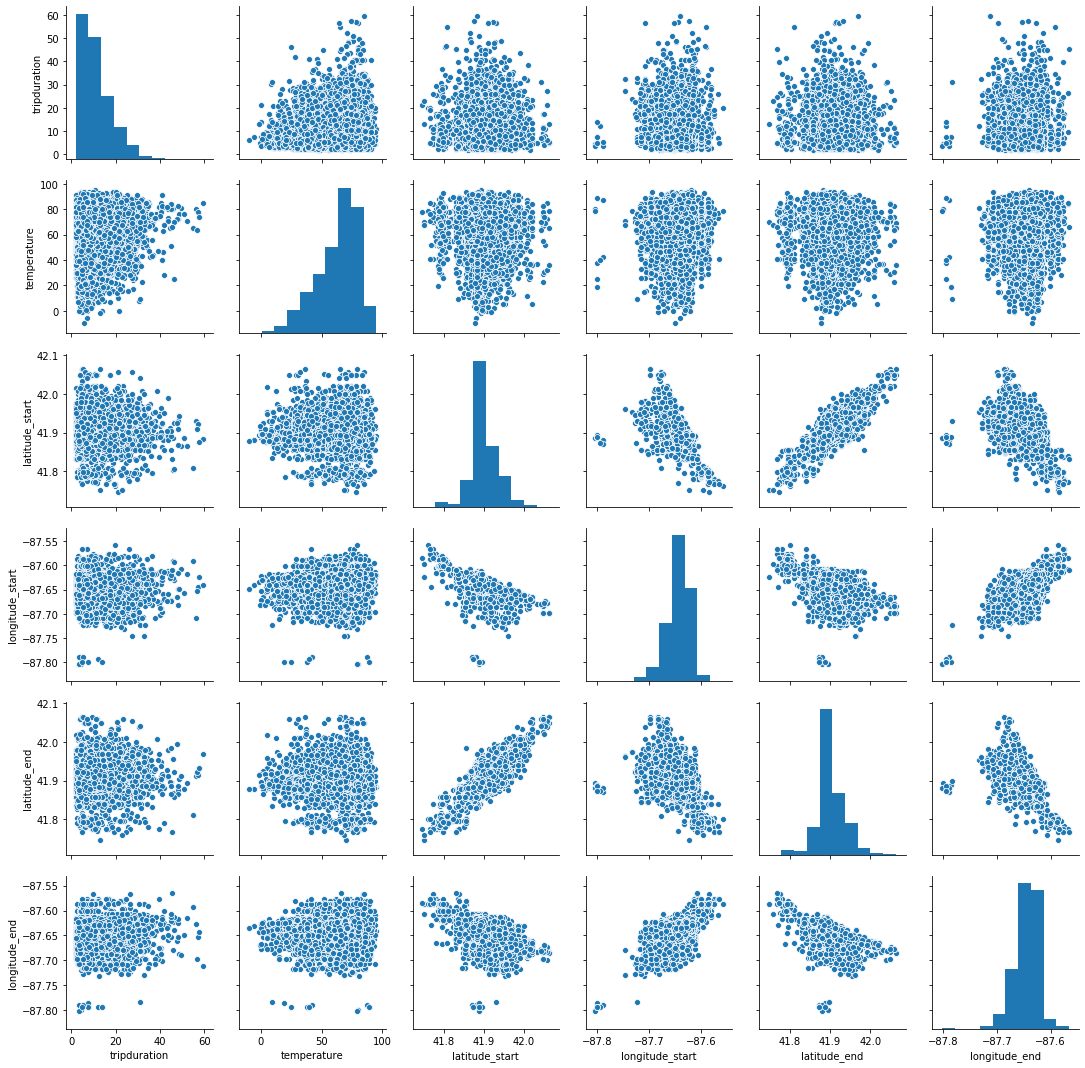

In [34]:
temp_df = data_df.drop(
    [
        'trip_id', 
        'year', 
        'month', 
        'week', 
        'day', 
        'hour',
        'usertype',
        'gender',
        'events',
        'from_station_id',
        'from_station_name',
        'to_station_id',
        'to_station_name',
        'dpcapacity_start',
        'dpcapacity_end'
    ], axis=1
)

sns.pairplot(temp_df)

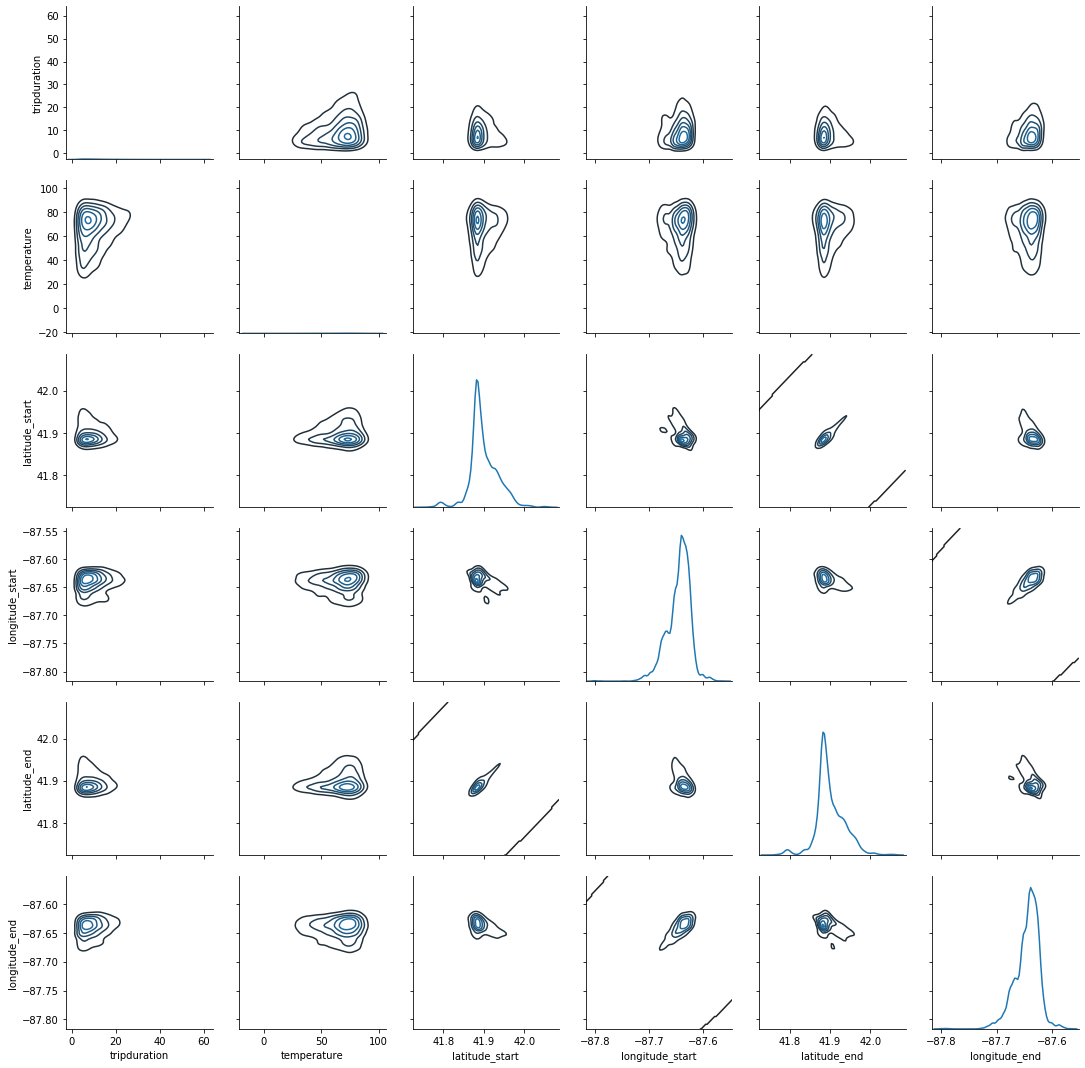

In [35]:
g = sns.PairGrid(temp_df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

## Categorical Data

**Categorical scatterplots:**

* `stripplot()` (with `kind="strip"`; the default)
* `swarmplot()` (with `kind="swarm"`)

**Categorical distribution plots:**

* `boxplot()` (with `kind="box"`)
* `violinplot()` (with `kind="violin"`)
* `boxenplot()` (with `kind="boxen"`)

**Categorical estimate plots:**

* `pointplot()` (with `kind="point"`)
* `barplot()` (with `kind="bar"`)
* `countplot()` (with `kind="count"`)

### Categorical Scatterplots

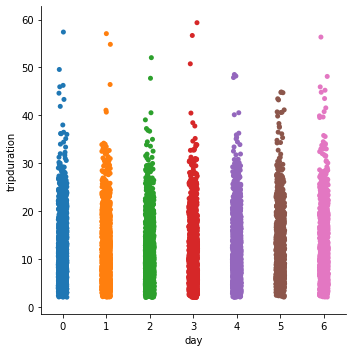

In [38]:
sns.catplot(
    x='day',
    y='tripduration',
    data=data_df
)

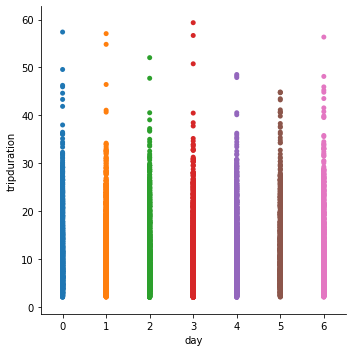

In [39]:
sns.catplot(
    x='day',
    y='tripduration',
    data=data_df,
    jitter=False
)

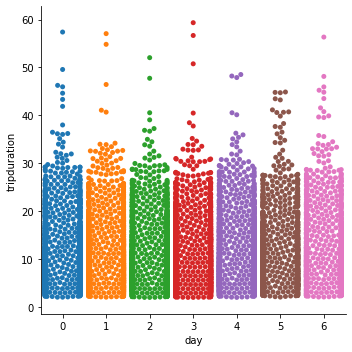

In [40]:
sns.catplot(
    x='day',
    y='tripduration',
    data=data_df,
    kind='swarm'
)

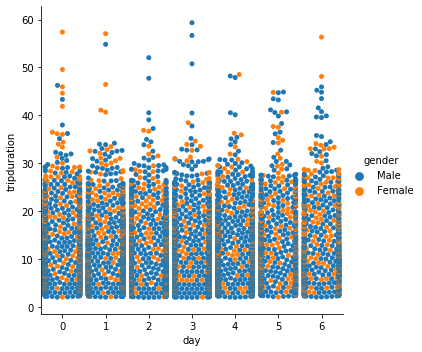

In [41]:
sns.catplot(
    x='day',
    y='tripduration',
    data=data_df,
    kind='swarm',
    hue='gender'
)

### Categorical Distribution Plots

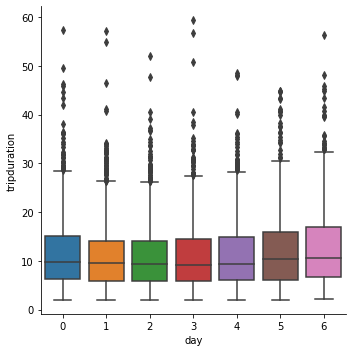

In [42]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='box',
    data=data_df
)

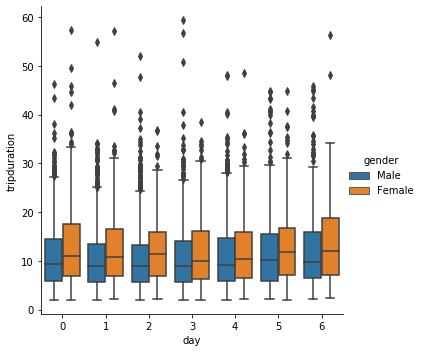

In [43]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='box',
    hue='gender',
    data=data_df
)

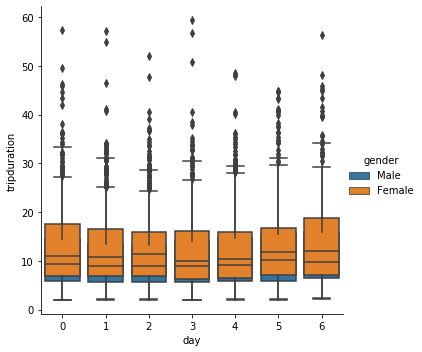

In [44]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='box',
    hue='gender',
    dodge=False,
    data=data_df
)

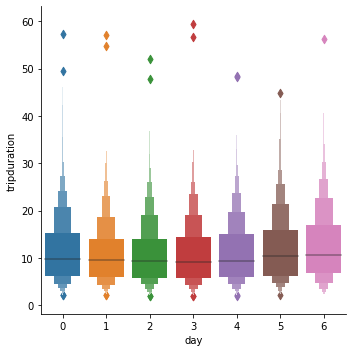

In [45]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='boxen',
    data=data_df
)

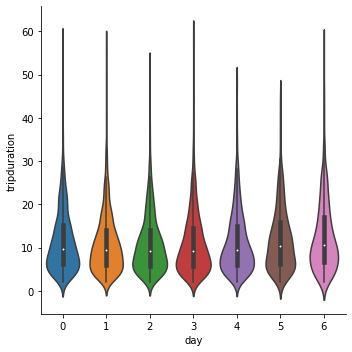

In [46]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='violin',
    data=data_df
)

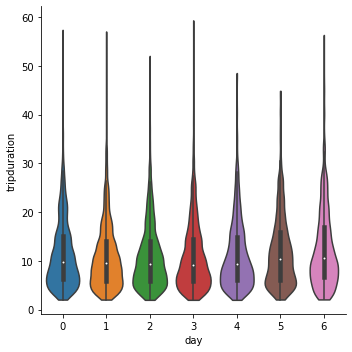

In [48]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='violin',
    bw=0.15,
    cut=0,
    data=data_df
)

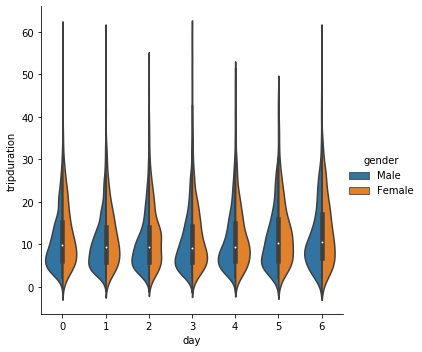

In [52]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='violin',
    hue='gender',
    split=True,
    data=data_df
)

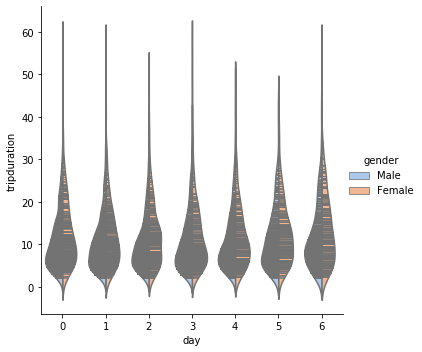

In [53]:
sns.catplot(
    x='day',
    y='tripduration',
    kind='violin',
    hue='gender',
    split=True,
    inner='stick',
    palette='pastel',
    data=data_df
)

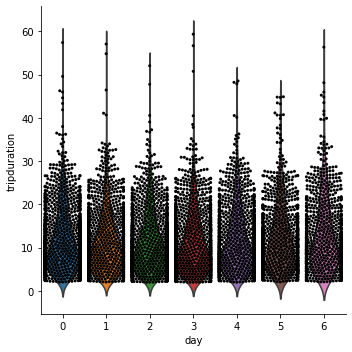

In [54]:
g = sns.catplot(
    x='day', 
    y='tripduration', 
    kind='violin', 
    inner=None, 
    data=data_df
)

sns.swarmplot(
    x='day', 
    y='tripduration', 
    color="k", 
    size=3, 
    data=data_df, 
    ax=g.ax
)

### Categorical Estimation Plots

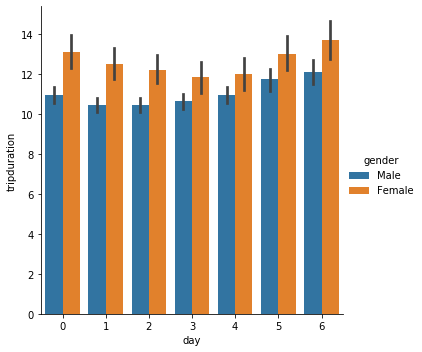

In [55]:
sns.catplot(
    x='day',
    y='tripduration',
    hue='gender',
    kind='bar',
    data=data_df
)

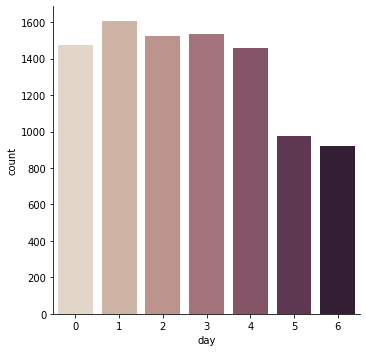

In [56]:
sns.catplot(
    x='day',
    kind='count',
    palette='ch:.25',
    data=data_df
)

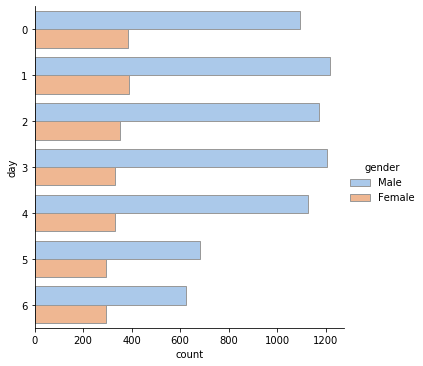

In [57]:
sns.catplot(
    y='day',
    hue='gender',
    kind='count',
    palette='pastel',
    edgecolor='.6',
    data=data_df
)

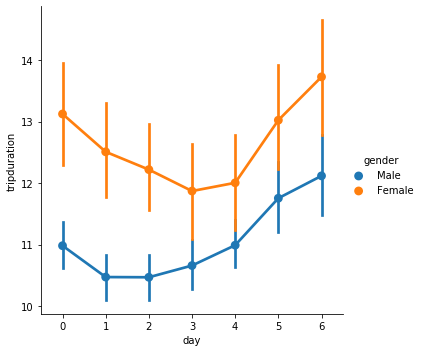

In [58]:
sns.catplot(
    x='day',
    y='tripduration',
    hue='gender',
    kind='point',
    data=data_df
)

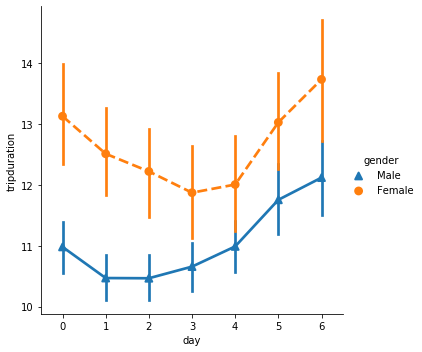

In [59]:
sns.catplot(
    x='day',
    y='tripduration',
    hue='gender',
    kind='point',
    markers=["^", "o"], linestyles=["-", "--"],
    data=data_df
)

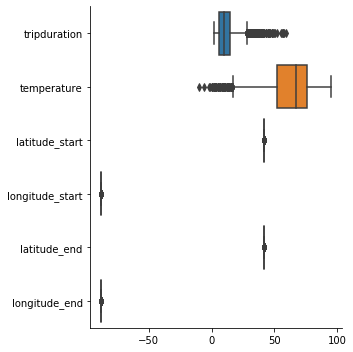

In [60]:
sns.catplot(
    data=temp_df, 
    orient="h", 
    kind="box"
)